#### import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### load the dataset

In [5]:
df = pd.read_csv('Tweets.csv')

#### show the data

In [6]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
# Shape of data
print("Dataset Shape:", df.shape)

Dataset Shape: (14640, 15)


In [8]:
# Columns and datatypes
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null 

In [9]:
# Check missing/null values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


####  Data Cleaning & EDA (Exploratory Data Analysis)

In [12]:
# remove Unnecessary columns with missing value
df_clean = df.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord', 'tweet_location', 'user_timezone'], axis=1)

In [13]:
# Check the data after cleaning
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.1+ MB


In [46]:
# save cleaned data
df_clean.to_csv('cleaned_twitter_data.csv', index=False)

print("save Cleaned data CSV file")

save Cleaned data CSV file


In [16]:
# again load clean data
df = pd.read_csv('cleaned_twitter_data.csv')

In [17]:
# now agin check any missing value 
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  5462
negativereason_confidence       4118
airline                            0
name                               0
retweet_count                      0
text                               0
tweet_created                      0
dtype: int64


In [18]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800


In [20]:
## replace value of negativereason and negativereason_confidence column
df['negativereason'] = df['negativereason'].fillna('No Negative Reason')
df['negativereason_confidence'] = df['negativereason_confidence'].fillna(0)

In [21]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
tweet_id                        0
airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
name                            0
retweet_count                   0
text                            0
tweet_created                   0
dtype: int64


#### remove duplicate rows

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.to_csv('final_cleaned_twitter_data.csv', index=False)

In [25]:
# again load clean data
df = pd.read_csv('final_cleaned_twitter_data.csv')

In [26]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created
0,570306133677760513,neutral,1.0000,No Negative Reason,0.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,570301130888122368,positive,0.3486,No Negative Reason,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,570301083672813571,neutral,0.6837,No Negative Reason,0.0000,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800


##  Exploratory Data Analysis (EDA)

In [28]:
# Shape of the data
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (14601, 10)


In [29]:
# Data types & info
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14601 entries, 0 to 14600
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14601 non-null  int64  
 1   airline_sentiment             14601 non-null  object 
 2   airline_sentiment_confidence  14601 non-null  float64
 3   negativereason                14601 non-null  object 
 4   negativereason_confidence     14601 non-null  float64
 5   airline                       14601 non-null  object 
 6   name                          14601 non-null  object 
 7   retweet_count                 14601 non-null  int64  
 8   text                          14601 non-null  object 
 9   tweet_created                 14601 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.1+ MB
None


In [30]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
            tweet_id airline_sentiment  airline_sentiment_confidence  \
count   1.460100e+04             14601                  14601.000000   
unique           NaN                 3                           NaN   
top              NaN          negative                           NaN   
freq             NaN              9157                           NaN   
mean    5.692156e+17               NaN                      0.899902   
std     7.782706e+14               NaN                      0.162965   
min     5.675883e+17               NaN                      0.335000   
25%     5.685581e+17               NaN                      0.692300   
50%     5.694720e+17               NaN                      1.000000   
75%     5.698884e+17               NaN                      1.000000   
max     5.703106e+17               NaN                      1.000000   

            negativereason  negativereason_confidence airline         name  \
count                14601          

### unique value counts

In [31]:
# Sentiment Distribution
print("\nSentiment Counts:")
print(df['airline_sentiment'].value_counts())


Sentiment Counts:
airline_sentiment
negative    9157
neutral     3091
positive    2353
Name: count, dtype: int64


In [32]:
# Airline-wise tweets
print("\nAirline Tweet Counts:")
print(df['airline'].value_counts())


Airline Tweet Counts:
airline
United            3822
US Airways        2913
American          2720
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64


In [33]:
# Negative Reason counts
print("\nNegative Reason Counts:")
print(df['negativereason'].value_counts())


Negative Reason Counts:
negativereason
No Negative Reason             5444
Customer Service Issue         2902
Late Flight                    1660
Can't Tell                     1190
Cancelled Flight                843
Lost Luggage                    721
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     480
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64


### sentiment distribution plot

In [42]:
import warnings
warnings.filterwarnings("ignore")

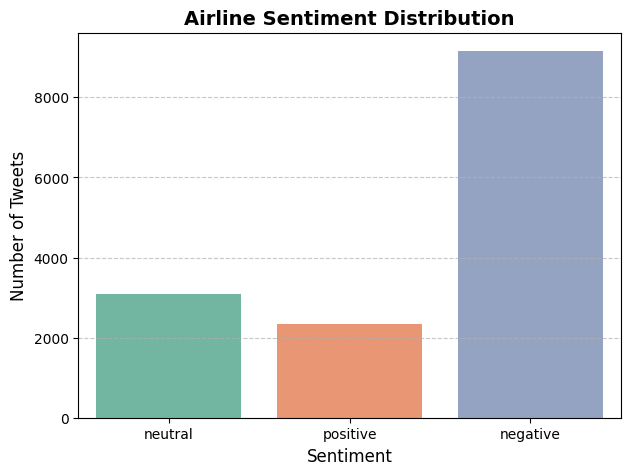

In [43]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='airline_sentiment', palette='Set2')
plt.title('Airline Sentiment Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Airline-wise Sentiment Count

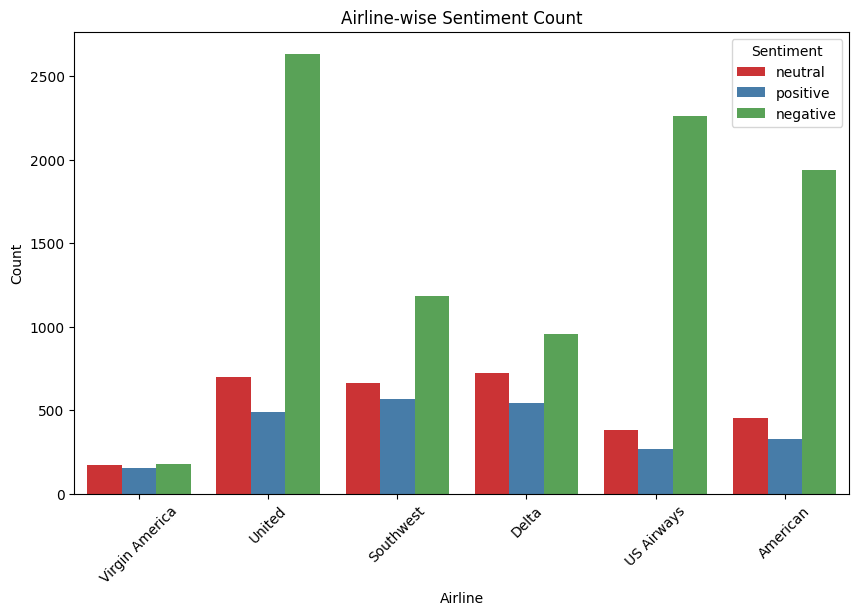

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='airline', hue='airline_sentiment', palette='Set1')
plt.title('Airline-wise Sentiment Count')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

### Negative Reason Bar Plot

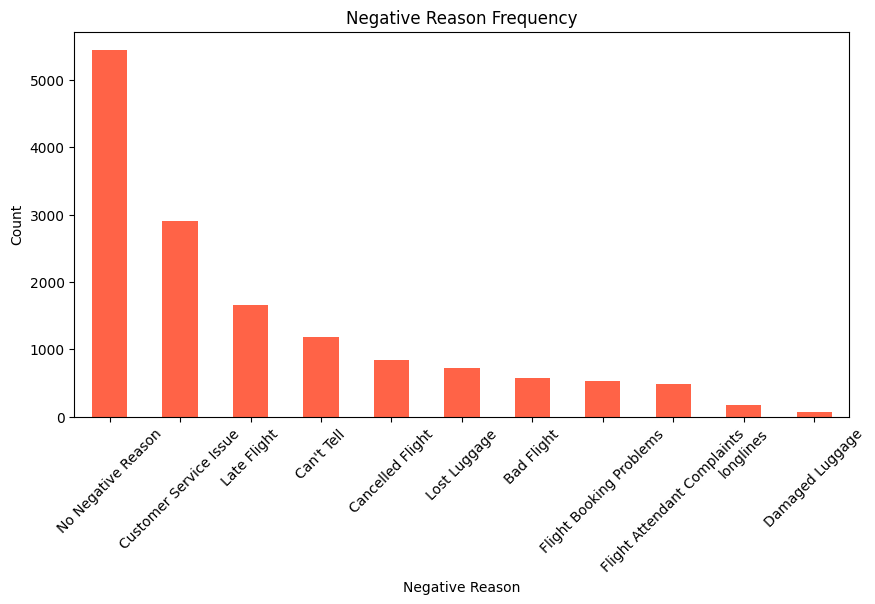

In [38]:
plt.figure(figsize=(10,5))
df['negativereason'].value_counts().plot(kind='bar', color='tomato')
plt.title('Negative Reason Frequency')
plt.xlabel('Negative Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Tweet Length Analysis

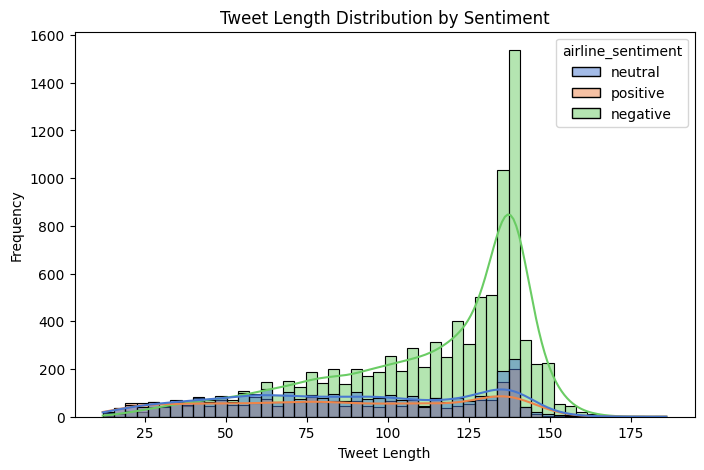

In [39]:
# Add Tweet Length Column
df['tweet_length'] = df['text'].apply(len)

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='tweet_length', hue='airline_sentiment', bins=50, kde=True, palette='muted')
plt.title('Tweet Length Distribution by Sentiment')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

### WordCloud for Negative Tweets

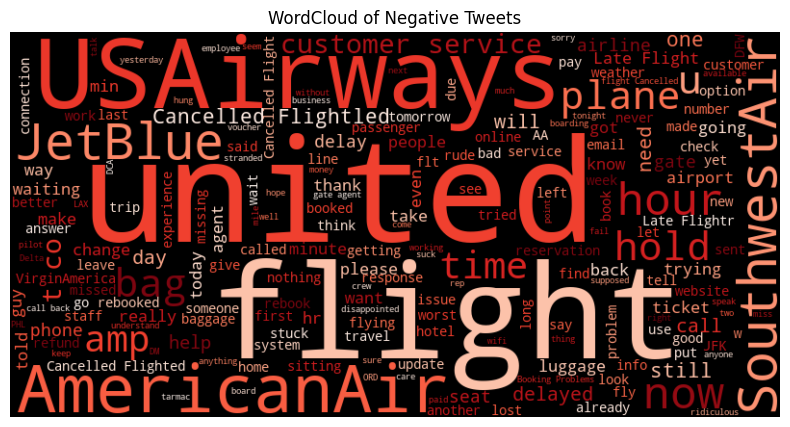

In [40]:

negative_tweets = " ".join(df[df['airline_sentiment'] == 'negative']['text'])

wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_tweets)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Negative Tweets')
plt.show()


##  Conclusion

The EDA highlights that negative sentiment dominates passenger feedback, primarily due to poor customer service, flight delays, and cancellations. Addressing these concerns can significantly enhance the customer experience and reduce negative feedback.


## ok task 4 is done